In [32]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/test-file/tested.csv


In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [34]:
df = pd.read_csv("/kaggle/input/test-file/tested.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [35]:
rows_to_drop = ['PassengerId','Name','SibSp','Parch','Ticket','Cabin','Embarked']

df.drop(columns = rows_to_drop, inplace = True)
df.head()

,Survived,Pclass,Sex,Age,Fare
0,0,3,male,34.5,7.8292
1,1,3,female,47.0,7.0000
2,0,2,male,62.0,9.6875
3,0,3,male,27.0,8.6625
4,1,3,female,22.0,12.2875


In [36]:
df['Sex'] = df['Sex'].map({'female': 0, 'male': 1})
df.head()

# or

# df['Sex'] = pd.get_dummies(df.Sex)
# df.head()

,Survived,Pclass,Sex,Age,Fare
0,0,3,1,34.5,7.8292
1,1,3,0,47.0,7.0000
2,0,2,1,62.0,9.6875
3,0,3,1,27.0,8.6625
4,1,3,0,22.0,12.2875


In [37]:
df.isnull().sum()

# There are many null values in Age column

Survived     0
Pclass       0
Sex          0
Age         86
Fare         1
dtype: int64

In [38]:
df['Age'] = df.Age.fillna(df.Age.mean())
df.head()

,Survived,Pclass,Sex,Age,Fare
0,0,3,1,34.5,7.8292
1,1,3,0,47.0,7.0000
2,0,2,1,62.0,9.6875
3,0,3,1,27.0,8.6625
4,1,3,0,22.0,12.2875


In [47]:
median_fare = df['Fare'].median()

df['Fare'].fillna(median_fare, inplace=True)

In [48]:
df.isnull().sum()

# Now the NaN values are resolved for Age column

Survived    0
Pclass      0
Sex         0
Age         0
Fare        0
dtype: int64

In [49]:
X = df.drop(columns = ['Survived'])
y = df['Survived']

X.shape, y.shape

((418, 4), (418,))

In [50]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

X_train.shape, y_train.shape

((334, 4), (334,))

In [51]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer.fit(X_train)

X_train_imputed = imputer.transform(X_train)
X_test_imputed = imputer.transform(X_test)

In [52]:
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()
model.fit(X_train, y_train)

GaussianNB()

In [53]:
y_pred = model.predict(X_test)
y_pred[:5], y_test[:5]

(array([0, 1, 0, 0, 1]),
 321    0
 324    1
 388    0
 56     0
 153    1
 Name: Survived, dtype: int64)

In [56]:
model.predict_proba(X_test)

array([[1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.

In [54]:
model.score(X_test, y_test)

1.0

<Axes: >

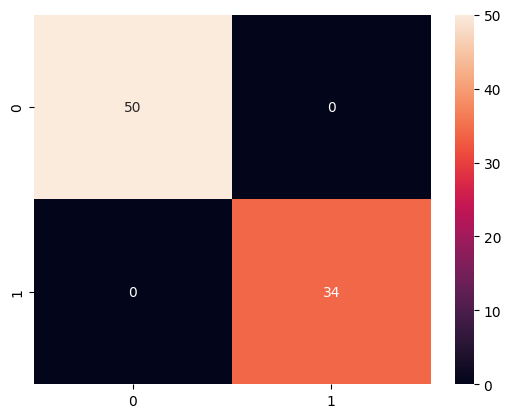

In [55]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

plt.ylabel("Predicted Value")
plt.xlabel("Actual Value")

sns.heatmap(cm, annot= True)